# Restricted Boltzmann Machine

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from rbm import RBM

## Load Mnist

In [2]:
import mnist
train_imgs = mnist.train_images()

## Plot Mnist data

In [3]:
def show_mnist(X, title = None, loc = 'center',**kwargs):
    num = X.shape[0]
    if num <= 10:
        imgs = np.moveaxis(X.reshape(-1, num, 28, 28), 1, 2).reshape(-1, num * 28)
        plt.figure(figsize=(num/2,num))
        if title:
            plt.title(title, kwargs, loc=loc)
        plt.axis('off')
        plt.imshow(imgs)
    elif num <= 100 and num % 10 == 0:
        imgs = np.moveaxis(X.reshape(-1, 10, 28, 28), 1, 2).reshape(-1, 10 * 28)
        plt.figure(figsize=(10,20))
        if title:
            plt.title(title, kwargs, loc=loc)
        plt.axis('off')
        plt.imshow(imgs)
    elif num <= 200 and num % 20 == 0:
        imgs = np.moveaxis(X.reshape(-1, 20, 28, 28), 1, 2).reshape(-1, 20 * 28)
        plt.figure(figsize=(10,20))
        if title:
            plt.title(title, kwargs, loc=loc)
        plt.axis('off')
        plt.imshow(imgs)
    else:
        print(f'{num} not fit, choose from:')
        print(list(range(1,10)))
        print([x for x in range(10,100,10)])
        print([x for x in range(100,1000,100)])

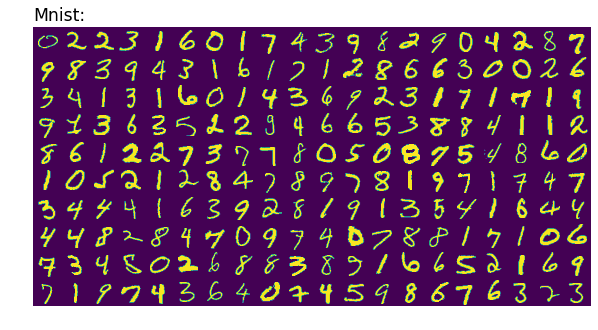

In [4]:
idxs = np.random.randint(0, len(train_imgs), 200) 
show_mnist(train_imgs[idxs],'Mnist:',loc = 'left', fontsize = 'xx-large')

## Initial RBM

In [5]:
mini_x = train_imgs[:5000]
mini_x = mini_x.reshape(5000,-1)
mini_binary = mini_x>0
model = RBM(num_visible = 784, num_hidden = 100)

## Train data : Contrastive Divergence

In [6]:
model.cd(mini_binary,5000)

Epoch 0: Error is 9802.038232620142
Epoch 100: Error is 2297.1099501592284
Epoch 200: Error is 1785.5509874844142
Epoch 300: Error is 1848.942813222233
Epoch 400: Error is 1711.4878651506017
Epoch 500: Error is 1692.0871184805892
Epoch 600: Error is 1692.192967936627
Epoch 700: Error is 1364.7995901494803
Epoch 800: Error is 1354.8468977245652
Epoch 900: Error is 1431.1405347139269
Epoch 1000: Error is 1379.6262118612915
Epoch 1100: Error is 1414.0876340390887
Epoch 1200: Error is 1412.8519580552124
Epoch 1300: Error is 1479.889617598424
Epoch 1400: Error is 1466.1488982619776
Epoch 1500: Error is 1297.315966626933
Epoch 1600: Error is 1322.6271706488196
Epoch 1700: Error is 1249.8202092349368
Epoch 1800: Error is 1406.0029854419406
Epoch 1900: Error is 1448.1664723724512
Epoch 2000: Error is 1324.54268970606
Epoch 2100: Error is 1411.9908372033838
Epoch 2200: Error is 1337.610090317328
Epoch 2300: Error is 1405.6842234357352
Epoch 2400: Error is 1392.7877773819614
Epoch 2500: Error is

## Reconstruct data

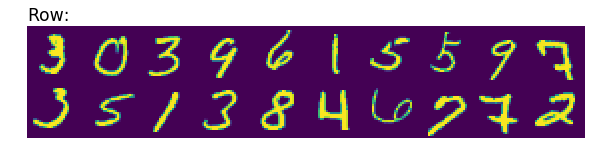

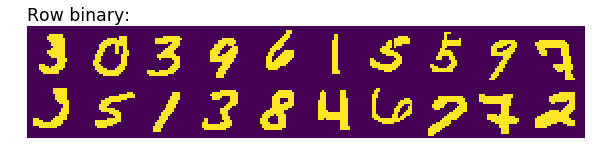

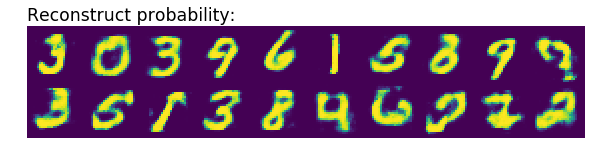

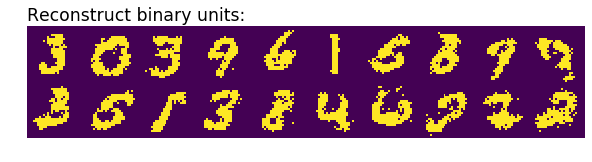

In [10]:
idxs = np.random.choice(5000, 20)
row = mini_x[idxs].reshape(20,-1)
row_binary = mini_binary[idxs].reshape(20,-1)
reconstruct,units = model.reconstruct(row, 10)
show_mnist(row,'Row:', loc= 'left', fontsize = 'xx-large')
show_mnist(row_binary,'Row binary:', loc= 'left', fontsize = 'xx-large')
show_mnist(reconstruct,'Reconstruct probability:',loc = 'left', fontsize = 'xx-large')
show_mnist(units,'Reconstruct binary units:',loc = 'left', fontsize = 'xx-large')

## Reconstruct with 1 - value

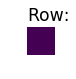

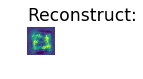

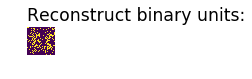

In [8]:
row = np.ones((1,28*28))
reconstruct,units = model.reconstruct(row)
show_mnist(row,'Row:', loc= 'left', fontsize = 'xx-large')
show_mnist(reconstruct,'Reconstruct:',loc = 'left', fontsize = 'xx-large')
show_mnist(units,'Reconstruct binary units:',loc = 'left', fontsize = 'xx-large')

## Visulize the Weights

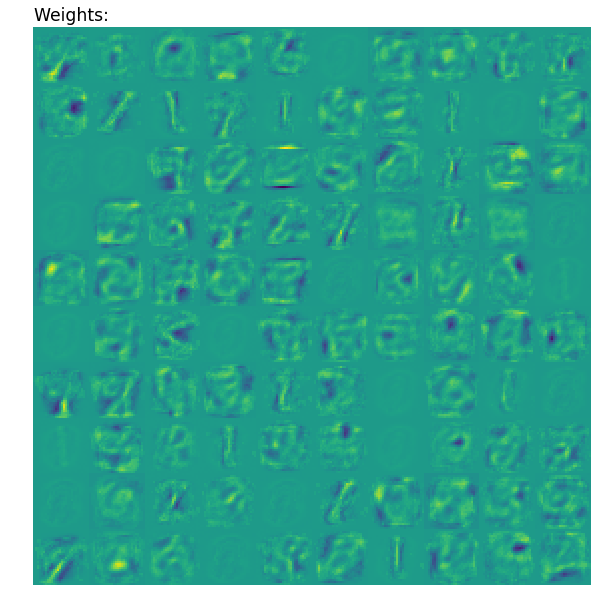

In [9]:
weights = model.weights.T
show_mnist(weights,'Weights:',loc = 'left', fontsize = 'xx-large')